# Level 2 Task 1
Task:Table Booking and Online Delivery
Determine the percentage of restaurants that
offer table booking and online delivery.
Compare the average ratings of restaurants
with table booking and those without.
Analyze the availability of online delivery
among restaurants with different price ranges.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# About Data 
Data is takken from Kaggle
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don't have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.

In [23]:
dataframe = pd.read_csv('zomato.csv')
dataframe.isnull().sum()



url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [14]:

dataframe.dropna(inplace=True)

In [18]:
dataframe.isnull().sum()
dataframe.drop_duplicates(inplace=True)

In [21]:
print(dataframe.describe())


              votes
count  23193.000000
mean     601.074462
std     1114.854301
min        0.000000
25%      101.000000
50%      221.000000
75%      586.000000
max    16832.000000


In [39]:
dataframe['rate'] = dataframe['rate'].astype(str).str.replace('/5', '').str.strip()
dataframe['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')
avg_rating_with_booking = dataframe[dataframe['book_table'] == 'Yes']['rate'].dropna().mean()
avg_rating_without_booking = dataframe[dataframe['book_table'] == 'No']['rate'].dropna().mean()
table_booking_percentage = (dataframe['book_table'] == 'Yes').sum() / len(dataframe) * 100
online_delivery_percentage = (dataframe['online_order'] == 'Yes').sum() / len(dataframe) * 100

print(f"Average rating for restaurants with table booking: {avg_rating_with_booking}")
print(f"Average rating for restaurants without table booking: {avg_rating_without_booking}")


Average rating for restaurants with table booking: 4.143464467005076
Average rating for restaurants without table booking: 3.621469981052572


In [36]:

dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).str.replace(',', '')

dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(float)


In [37]:
delivery_by_price_range = dataframe.groupby('approx_cost(for two people)')['online_order'].value_counts(normalize=True).unstack().fillna(0) * 100


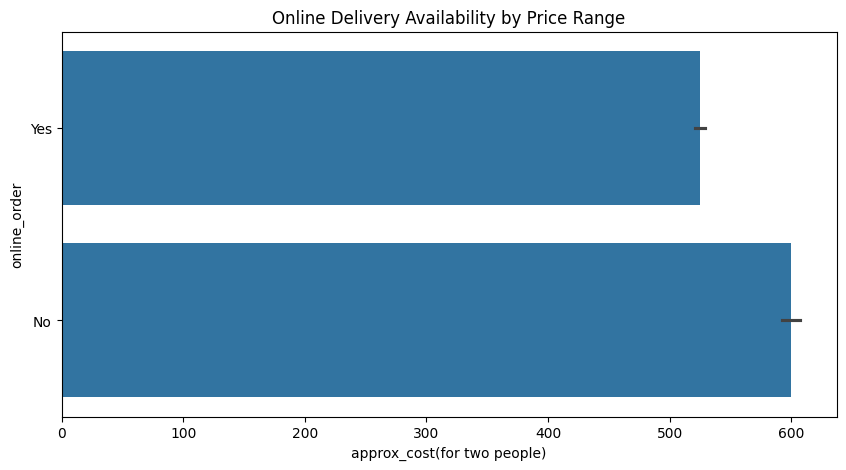

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(x='approx_cost(for two people)', y='online_order', data=dataframe)
plt.title('Online Delivery Availability by Price Range')
plt.show()